# Analysing New York City High School Data
One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests, and whether they're unfair to certain groups. Given our prior knowledge of this topic, investigating the correlations between SAT scores and demographics might be an interesting angle to take. We could correlate SAT scores with factors like race, gender, income, and more.


The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the data set for our project is based on 2,400 total points). Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.

The data used here has been cleaned and exported from a different project [here]().


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
combined = pd.read_csv("combined.csv")
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon,school_dist
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to New York City residents,0,0,0,0,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260,1
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797,1
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041,1
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,0,0,0,0,0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",40.720569,-73.985673,1
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,0,0,0,0,0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",40.718725,-73.979426,1


In [3]:
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
    "sat_score"
]
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")

There are several fields in combined that originally came from a survey of parents, teachers, and students. Make a bar plot of the correlations between these fields and `sat_score`.

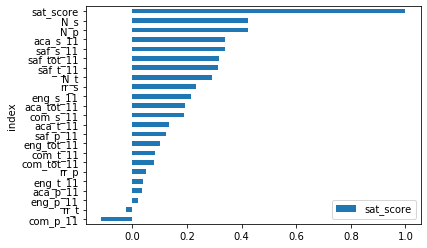

In [4]:
survey_corr = combined[survey_fields].corr()
survey_corr = survey_corr.reset_index().sort_values(by='sat_score')
survey_corr.plot.barh(x='index',y='sat_score');

From the above we can see that `saf_s_11` and `saf_t_11` correlates nicely with sat_score. 
`N_s` and `N_p` which indicate the number of respondants have a high correlation. This is expected as they are proxies to`total_enrollment`. is worth investigating. Also, `aca_s_11` which is the academic rating of a school by students has a positive relationship with `sat_scores` so it would be wise to take up students opinion on school as opposed to teacher or parents.

On the last screen, you may have noticed that `saf_t_11` and `saf_s_11`, which measure how teachers and students perceive safety at school, correlated highly with `sat_score`. On this screen, we'll dig into this relationship a bit more, and try to figure out which schools have low safety scores.

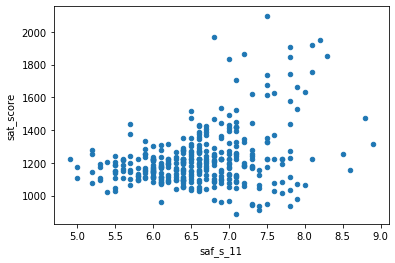

In [5]:
combined.plot.scatter("saf_s_11","sat_score");

We can see that there is a cluster of schools above the 1800 for scores greater than 7.0 These schools are worth investigating for a parent looking for a good school for the child. The relationship is linear for most of the observations. The sweet spot is schools with a 7.0 - 8.5 rating score. The correlation is not that strong.

##  Visualizing saftey score across Districts.

In [6]:
# Compute the average safety score for each district.
districts = combined.groupby('school_dist').agg(np.mean)

In [7]:
import os
os.environ['PROJ_LIB'] = 'C:\\a\\Lib\\site-packages\\mpl_toolkits\\basemap'
from mpl_toolkits.basemap import Basemap

In [8]:
def nyc_plot_district(fieldname):
    fig,ax = plt.subplots(figsize = (6,6))
    m = Basemap(projection = 'merc',
                llcrnrlat = 40.496044,
                urcrnrlat = 40.915256, 
                llcrnrlon = -74.255735, 
                urcrnrlon = -73.700272,
                resolution = 'h')
    m.drawcoastlines(color = 'black', linewidth = 1)
    m.drawmapboundary(fill_color = '#85A6D9')
    
    # Creating scatterplot
    m.scatter(district['lon'].tolist(), 
              district['lat'].tolist(),
              zorder = 2, s=20, 
              latlon = True, 
              c=district[fieldname], 
              cmap = 'summer')
    if fieldname == 'saf_s_11':
        ax.set_title('Heat-Map: District Wise Safety Scores for NYC Schools')
    plt.show()
    

def nyc_plot_school(df):
    fig,ax = plt.subplots(figsize = (6,6))
    m = Basemap(projection = 'merc', 
                llcrnrlat = 40.496044,
                urcrnrlat = 40.915256, 
                llcrnrlon = -74.255735, 
                urcrnrlon = -73.700272,
                resolution = 'i')
    m.drawcoastlines(color = 'black', linewidth = 1)
    m.drawmapboundary(fill_color = '#85A6D9')
    
    # Creating scatterplot
    m.scatter(df['lon'].tolist(), 
              df['lat'].tolist(),
              zorder = 2, s=20, 
              latlon = True, 
              c='black')
    ax.set_title('Scatter Plot: NYC Schools')
    plt.show()

C:\a\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\a\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]


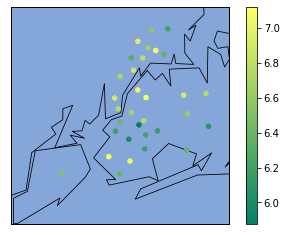

In [9]:
# Make a map that shows safety scores by district.
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='black', linewidth=.8)
m.drawrivers(color='#6D5F47', linewidth=.8)
latitudes = districts['lat'].tolist()
longitudes = districts['lon'].tolist()
m.scatter(longitudes,latitudes,s=20,latlon=True,zorder=2,c = districts["saf_s_11"], cmap="summer")
plt.colorbar()

Shools in Manhattan,Bronx and Queens have higher  saftey scores as against schools in Brooklyn.

## Analyzing Racial Differences
There are a few columns that indicate the percentage of each race at a given school:

- white_per
- asian_per
- black_per
- hispanic_per

By plotting out the correlations between these columns and `sat_score`, we can determine whether there are any racial differences in SAT performance.

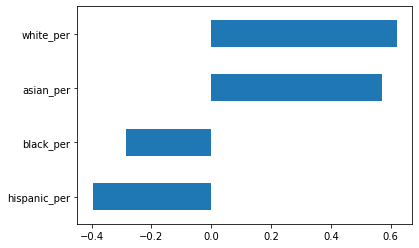

In [10]:
races = ['white_per','asian_per','black_per','hispanic_per']
combined.corr()['sat_score'][races].sort_values().plot.barh();

The above chart is an indication that whites and asians score higher(or at least schools with high percent of them) whereas blacks and hispanics do not. 
Let's dig deeper into schools with high value for `hispanic_per` and low SAT scores.

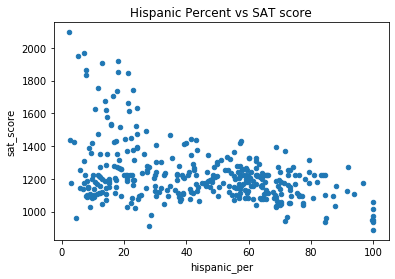

In [11]:
combined.plot.scatter(y="sat_score", x="hispanic_per", title="Hispanic Percent vs SAT score");

There is a cluster of schools with 100% `hispanic_per` and `sat_scores` below 1200. Schools with `hispanic_per` greater than 30 often do not go above 1500 for `sat_score`. Since the aim to to investigate schools with high `hispanic_per` and low SAT scores; we dig into schools with over 95% hispanic population.

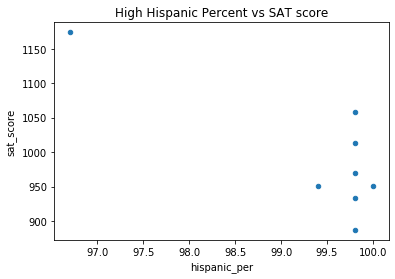

In [12]:
high_hispanic = combined[combined['hispanic_per'] > 95]
high_hispanic.plot.scatter(y="sat_score", x="hispanic_per", title="High Hispanic Percent vs SAT score");

Eight schools fall into this category. It would be intresting to see if they have anything in common. These schools are:

In [13]:
high_hispanic.T

,44,82,89,125,141,176,253,286
DBN,02M542,06M348,06M552,09X365,10X342,12X388,19K583,24Q296
SCHOOL NAME,MANHATTAN BRIDGES HIGH SCHOOL,WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL,GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...,ACADEMY FOR LANGUAGE AND TECHNOLOGY,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,MULTICULTURAL HIGH SCHOOL,PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Num of SAT Test Takers,66,70,56,54,49,30,29,55
SAT Critical Reading Avg. Score,336,380,339,315,300,321,279,317
SAT Math Avg. Score,378,395,349,339,333,351,322,323
SAT Writing Avg. Score,344,399,326,297,301,298,286,311
sat_score,1058,1174,1014,951,934,970,887,951
SchoolName,Manhattan Bridges High School,0,GREGORIO LUPERON HS SCI & MATH,Academy for Language and Technology,International School for Liberal Arts,0,Multicultural High School,0
AP Test Takers,67,129.029,88,20,55,129.029,44,129.029
Total Exams Taken,102,197.038,138,20,73,197.038,44,197.038


We try to gain insight into these schools by investing if they have any feature that correlates nicely with SAT scores. We focus on features that have negative correlations with SAT score to narrow our scope and focus on why these schools have low SAT scores.

In [14]:
hi_hispanic_corr = high_hispanic.corr()
mask = hi_hispanic_corr['sat_score'] < -0.25
hi_hispanic_corr[mask]['sat_score']

Cohort                              -0.363129
CSD                                 -0.629173
NUMBER OF STUDENTS / SEATS FILLED   -0.513313
NUMBER OF SECTIONS                  -0.569436
ell_num                             -0.676540
ell_percent                         -0.885803
hispanic_per                        -0.805102
female_per                          -0.820237
rr_t                                -0.442326
zip                                 -0.705854
lon                                 -0.640916
school_dist                         -0.629173
Name: sat_score, dtype: float64

Columns: `zip`,`lon`,`school_dist`,`CSD` do not have any statistical significance. As expected, `hispanic_per` has a high negative correlation. We notice one key insight here; `ell_percent` - the percenrage of English learners - affects the SAT scores negatively. Since these schools are mostly hispanic, it makes sense they have a high number of English learners and this would affect the comprehension of subjects taught in English and hence result in lower SAT scores. There is also a pointer that higher number of females in hispanic schools results in lower SAT scores. 

Let us make a contradictory investigation. Looking into schools  with a `hispanic_per` less than 10% and an average SAT score greater than `1800`.

In [15]:
low_hispanic = combined[(combined['hispanic_per'] < 10) & (combined['sat_score'] > 1800)]
low_hispanic.T

,37,151,187,327,356
DBN,02M475,10X445,13K430,28Q687,31R605
SCHOOL NAME,STUYVESANT HIGH SCHOOL,BRONX HIGH SCHOOL OF SCIENCE,BROOKLYN TECHNICAL HIGH SCHOOL,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,STATEN ISLAND TECHNICAL HIGH SCHOOL
Num of SAT Test Takers,832,731,1277,121,227
SAT Critical Reading Avg. Score,679,632,587,612,635
SAT Math Avg. Score,735,688,659,660,682
SAT Writing Avg. Score,682,649,587,596,636
sat_score,2096,1969,1833,1868,1953
SchoolName,STUYVESANT HS,BRONX HS OF SCIENCE,BROOKLYN TECHNICAL HS,Queens HS for Science York Colllege,STATEN ISLAND TECHNICAL HS
AP Test Takers,1510,1190,2117,215,528
Total Exams Taken,2819,2435,3692,338,905


In [16]:
low_hispanic_corr = low_hispanic.corr()
mask = low_hispanic_corr['sat_score'] > 0.25
low_hispanic_corr[mask]['sat_score']

SAT Critical Reading Avg. Score         0.985722
SAT Math Avg. Score                     0.982875
SAT Writing Avg. Score                  0.987101
sat_score                               1.000000
Number of Exams with scores 3 4 or 5    0.323419
SIZE OF LARGEST CLASS                   0.382332
male_per                                0.587097
com_p_11                                0.368534
eng_p_11                                0.563521
saf_s_11                                0.299506
eng_s_11                                0.253896
Name: sat_score, dtype: float64

Nothing quite pops as we look at these numbers. Students think the school is relatively safe. We futher our analysis by seeking information else where say in google.

On further investigation, I found that most of this schools are Technical schools and require there students to pass a standardized test before admission. We can assume they have "better students".

### Investigating Gender Bias

Moving forward, we look into the data to find if there is any gender bias in SAT scores.

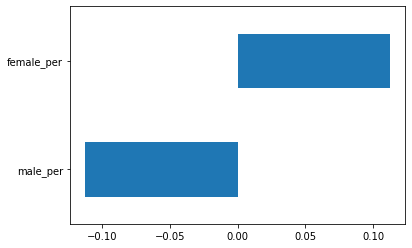

In [17]:
gender = ['male_per', "female_per"]
combined.corr()['sat_score'][gender].plot.barh();
# fields_corr = combined[fields].corr()
# fields_corr.plot.barh("male_per","sat_score");

There is a positive correlation for females and negative correlation for males. Nevertheless, the correlation is not strong.

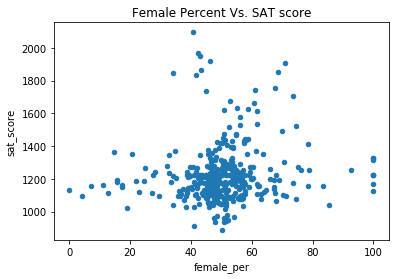

In [18]:
combined.plot.scatter('female_per','sat_score', title="Female Percent Vs. SAT score");

The plot shows no significant relationship. We can see that most schools have female percent in the range 40-60. Schools with above 60% females tend to have SAT scores above 1000 and there are some all girls school which seem to always do well in SATs. We focus on schools with high female percent and high SAT scores.

In [22]:
combined[(combined['female_per'] > 60) & (combined['sat_score'] > 1700)][['SCHOOL NAME','sat_score']]

,SCHOOL NAME,sat_score
5,BARD HIGH SCHOOL EARLY COLLEGE,1856.0
26,ELEANOR ROOSEVELT HIGH SCHOOL,1758.0
60,BEACON HIGH SCHOOL,1744.0
61,FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...,1707.0
302,TOWNSEND HARRIS HIGH SCHOOL,1910.0


On Googling these schools, I found out that these were high standard Art schools. 

### Exploring AP exams and SAT scores.

High school students(in the US) take [Advanced Placement](https://en.wikipedia.org/wiki/Advanced_Placement_exams) (AP) exams to earn college credit.

It makes sense that the number of students at a school who took AP exams would be highly correlated with the school's SAT scores.
Let's explore this relationship.

In [23]:
# let us recall our dataset
combined.head().T

,0,1,2,3,4
DBN,01M292,01M448,01M450,01M509,01M539
SCHOOL NAME,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,EAST SIDE COMMUNITY SCHOOL,MARTA VALLE HIGH SCHOOL,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ..."
Num of SAT Test Takers,29,91,70,44,159
SAT Critical Reading Avg. Score,355,383,377,390,522
SAT Math Avg. Score,404,423,402,433,574
SAT Writing Avg. Score,363,366,370,384,525
sat_score,1122,1172,1149,1207,1621
SchoolName,0,UNIVERSITY NEIGHBORHOOD H.S.,EAST SIDE COMMUNITY HS,0,"NEW EXPLORATIONS SCI,TECH,MATH"
AP Test Takers,129.029,39,19,129.029,255
Total Exams Taken,197.038,49,21,197.038,377


In [24]:
# we get the percentage of students who took the ap exam
# AP Test Takers column is the number(average) of students that took the AP exams
combined['ap_per'] = (combined['AP Test Takers '] / combined['total_enrollment']) * 100
# ap_per.head()

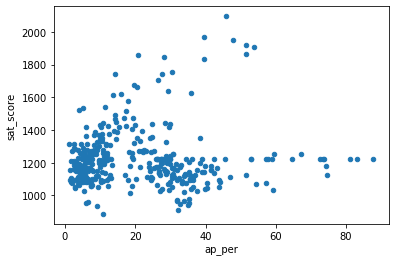

In [25]:
combined.plot.scatter('ap_per','sat_score');

In [26]:
combined.corr()['sat_score']['ap_per']

0.0571708139076698

There is a higher chance of a school having better SAT scores if the percentage of AP exam takers is above 50. The correlation is not significant.

## Exploring Class size and SAT scores.

In [27]:
combined.corr()['sat_score'][['AVERAGE CLASS SIZE','NUMBER OF STUDENTS / SEATS FILLED']]

AVERAGE CLASS SIZE                   0.381014
NUMBER OF STUDENTS / SEATS FILLED    0.394626
Name: sat_score, dtype: float64

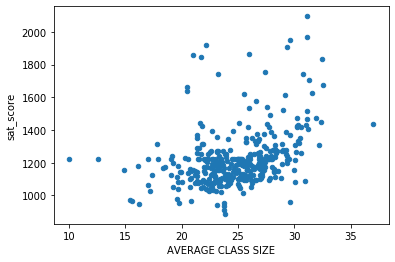

In [28]:
combined.plot.scatter('AVERAGE CLASS SIZE','sat_score');

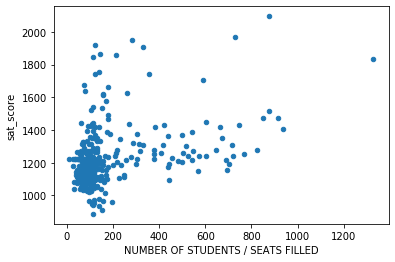

In [29]:
combined.plot.scatter('NUMBER OF STUDENTS / SEATS FILLED','sat_score');

There is definetly a point to be made for larger classes. This is made more evident by the `NUMBER OF STUDENTS/ SEATS FILLED` column. Schools with higher population have a higher tendency of having higher SAT scores.

## Conclusion:
From the subset of data analysed, these conclusions were reached.
- Schools with high percentage of English language learners do not do very well in SATs
- Safety is important for academic excellence.
- Students opinion on standard of a school is important.
- Manhanttan, Queens and the Bronx have the safest schools.